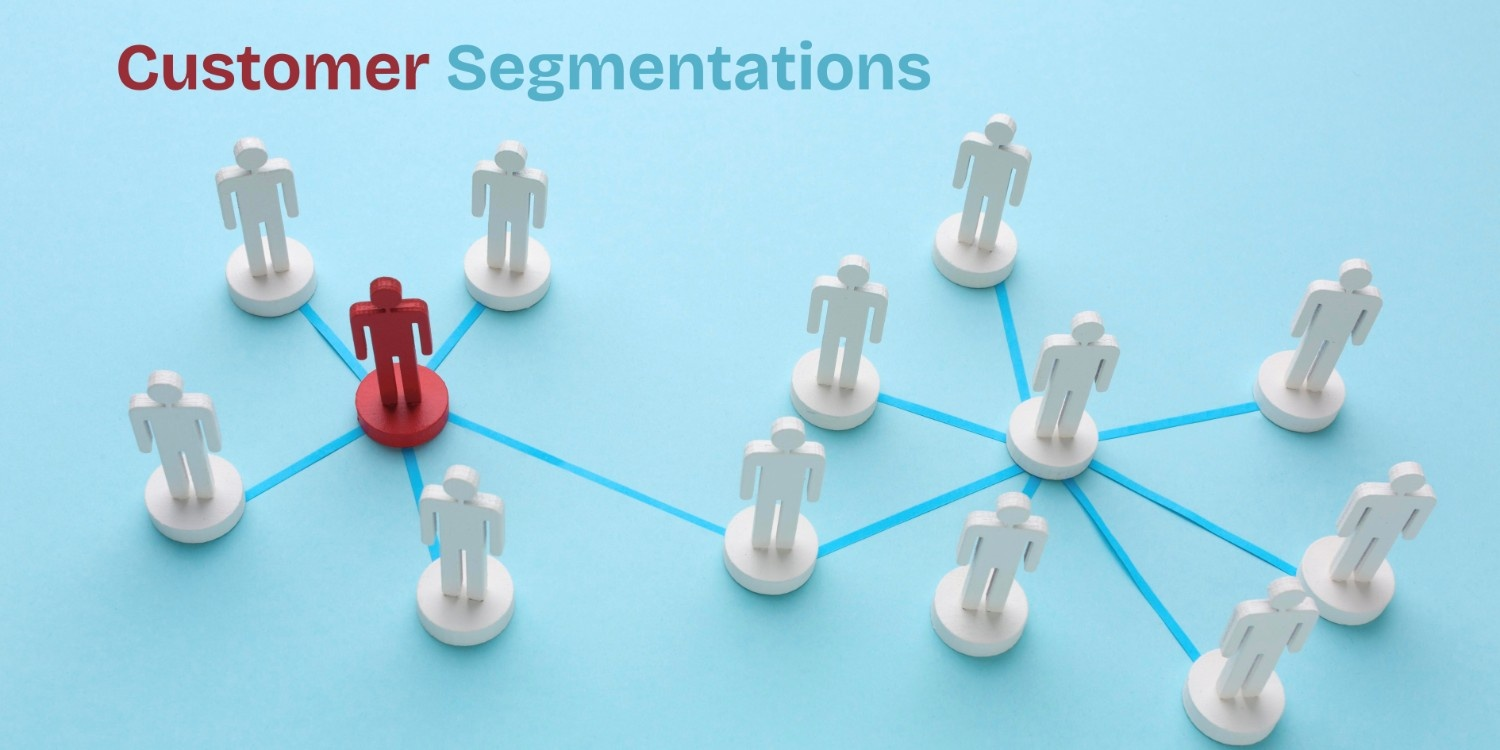

# Customer Segmentation Using Unsupervised Learning
## Objective:
Cluster customers based on spending habits and other features and propose marketing strategies tailored to each segment.

## Data:

This is a Dataset of a shopping Mall with the following simple features.

**Customer ID:**   unique ID for each customer   
**Gender:**   Male/Female   
**Age:**   18 - 70   
**Annual Income k$:**   15 - 137   
**Spending Score (1-100):**  1 - 100     

## Importing Necessary Libraries:

In [ ]:
!pip uninstall pandas_profiling
!pip install ydata_profiling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from y_data import ProfileReport
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('2. Data\Mall_customers.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [9]:
print(df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max())

15 137


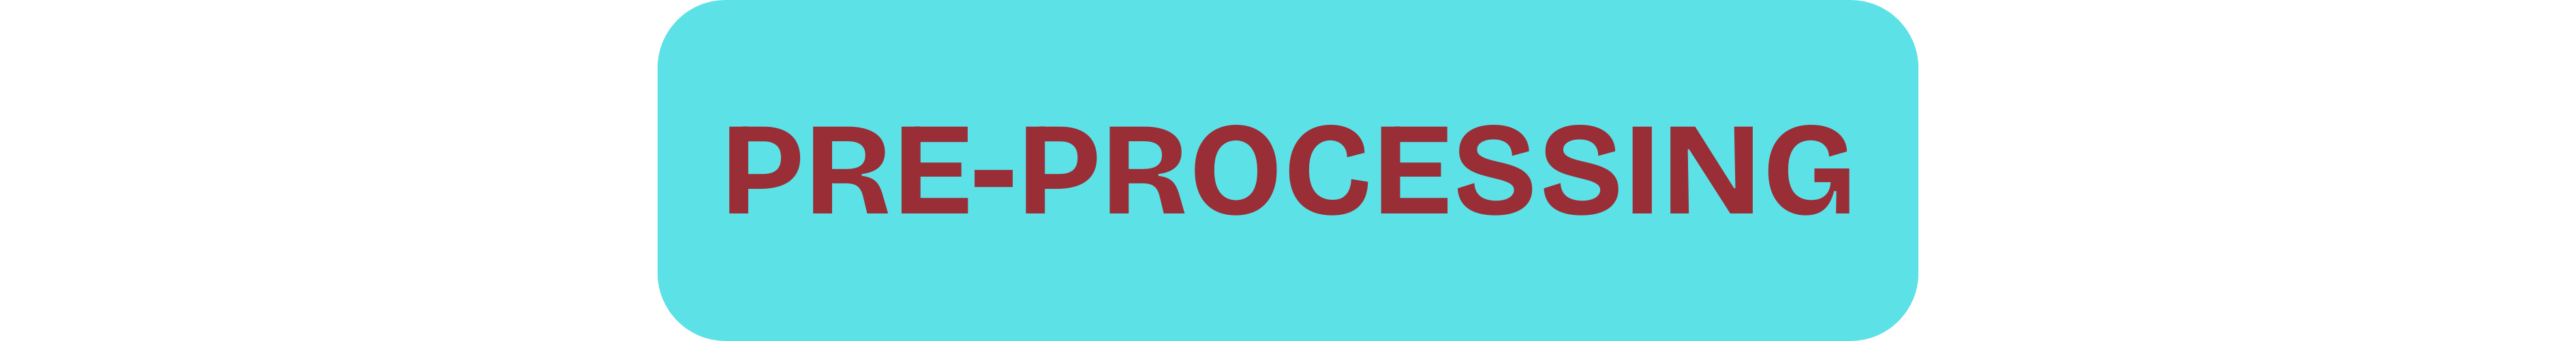

## Pre-Processing:   
---

In [12]:
df.drop(columns=['CustomerID'], inplace=True)

In [13]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [14]:
scaler = MinMaxScaler(feature_range=(1,10))
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,10.0,1.173077,1.000000,4.489796
1,10.0,1.519231,1.000000,8.346939
2,1.0,1.346154,1.073770,1.459184
3,1.0,1.865385,1.073770,7.979592
4,1.0,3.250000,1.147541,4.581633
...,...,...,...,...
195,1.0,3.942308,8.745902,8.163265
196,1.0,5.673077,9.188525,3.479592
197,10.0,3.423077,9.188525,7.704082
198,10.0,3.423077,10.000000,2.561224


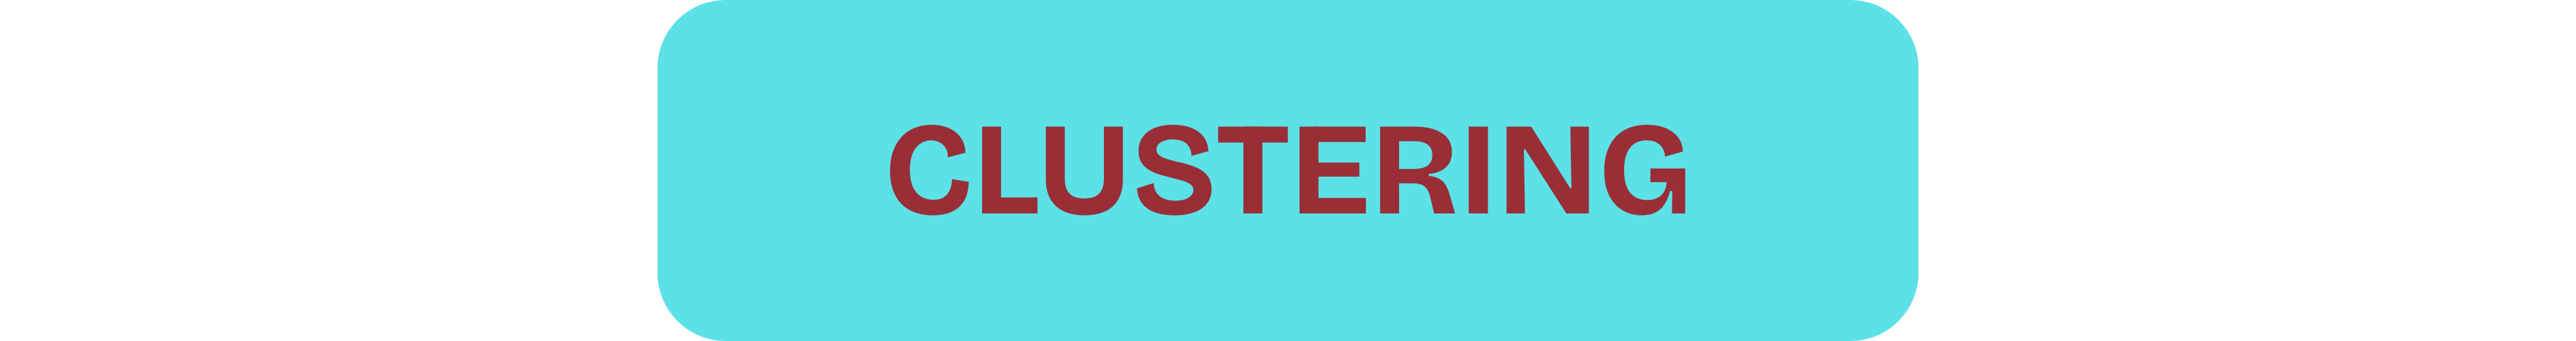

## Clustering:   
---

In [18]:
max_clusters = 20 

In [19]:
kmeans_test = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)] # list of 20 algorithms with 1-20 kmeans clusters 

inertias = [kmeans_test[i].fit(scaled_df).inertia_ for i in range(len(kmeans_test))] # list of 20 inertias corresponding to the 20 kmeans algorithms
# Inertia: Sum of squared distances of samples to their closest cluster center

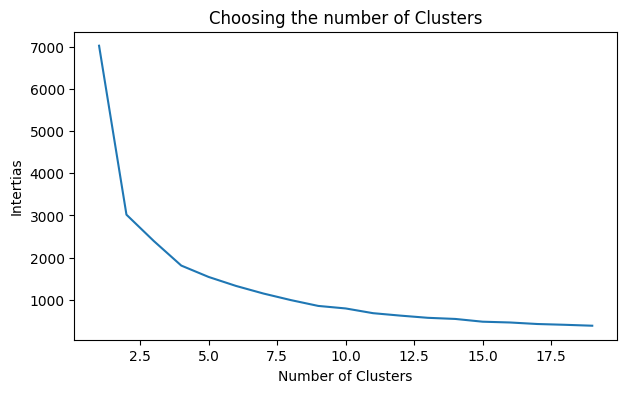

In [20]:
# Using Elbow method to decide number of clusters for the KMean algorithm
plt.figure(figsize=(7,4))
plt.plot(range(1,max_clusters), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Intertias')
plt.title('Choosing the number of Clusters')
plt.show()

In [21]:
# from the chart above, 4 seems to be the tip of Elbow graph which is best choice for the number of clusters
kmeans = KMeans(n_clusters=4, n_init=10)           # initializing the algorithm
kmeans.fit(scaled_df)                              # training the model

KMeans(n_clusters=4, n_init=10)

In [22]:
clusters = kmeans.predict(scaled_df)    # classifying each observation to one of the 4 classes
clusters

array([1, 1, 2, 0, 0, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 0, 2, 1, 3, 0,
       2, 0, 2, 0, 0, 0, 2, 1, 0, 3, 2, 3, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1,
       2, 2, 1, 0, 3, 2, 2, 2, 3, 1, 2, 3, 0, 2, 3, 1, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 1, 3, 2, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3, 3,
       3, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 3, 1, 3, 1, 3, 1,
       0, 0, 3, 0, 2, 1, 3, 0, 2, 1, 0, 0, 3, 1, 3, 0, 2, 1, 3, 1, 2, 0,
       2, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 3, 1, 3, 1, 2, 0,
       3, 1, 3, 1, 2, 0, 3, 0, 2, 1, 2, 1, 2, 0, 2, 0, 3, 0, 2, 0, 2, 1,
       3, 1])

In [23]:
centroids = kmeans.cluster_centers_       # list of Centers of each class in the 4D space
centroids

array([[ 1.        ,  2.80668016,  4.29508197,  7.12406015],
       [10.        ,  2.77403846,  4.46721311,  7.49056122],
       [ 1.        ,  6.21118881,  4.23248882,  4.10241187],
       [10.        ,  6.44110577,  4.49795082,  3.59056122]])

In [24]:
centroids_df = pd.DataFrame(centroids, columns=scaled_df.columns)  # converting above to the DataFrame format
centroids_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,2.806680,4.295082,7.124060
1,10.0,2.774038,4.467213,7.490561
2,1.0,6.211189,4.232489,4.102412
3,10.0,6.441106,4.497951,3.590561


In [25]:
# Inverse transforming the centroids to see on original scale of Data
original_centroids = scaler.inverse_transform(centroids)
genders = encoder.inverse_transform(original_centroids[:,0].round().astype(int))

df_centroids = pd.DataFrame(original_centroids, columns=scaled_df.columns)
df_centroids['Gender'] = genders

df_centroids

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,28.438596,59.666667,67.684211
1,Male,28.250000,62.000000,71.675000
2,Female,48.109091,58.818182,34.781818
3,Male,49.437500,62.416667,29.208333


#### **Cluster Centers:**

**Cluster 0:**   [Gender: Female, Age: 48, Income: $ 59k, Spending Score: 34]

**Cluster 1:**      [Gender: Male, Age: 49, Income: $ 62k, Spending Score: 29]

**Cluster 2:**   [Gender: Female, Age: 28, Income: $ 60k, Spending Score: 68] 

**Cluster 3:**   [Gender: Male, Age: 28, Income: $ 62k , Spending Score: 72]   

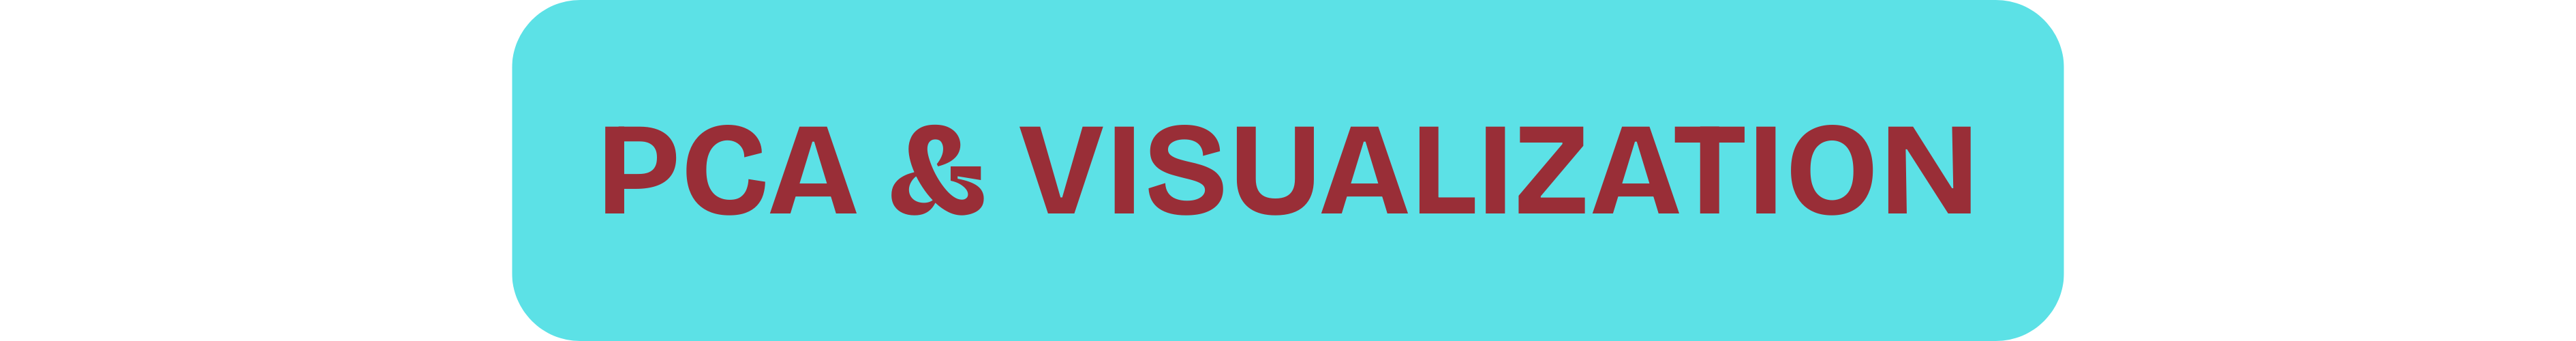

## PCA and Visualization:
---

Since the Clusters lies in the 4D space so it is impossible to visualize. Inorder to have a visual sense of the clusters we can get the help of Principal Component Analysis (PCA) model to reduce/shrink the 4D axis/dimensions (components) to 2D axis/dimensions (components), and ultimately visualze it in 2D space.

In [30]:
pca = PCA(n_components=2)      # initializing the model

reduced_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=['PC1', 'PC2']) # transforming the data from 4D to 2D
reduced_df

,PC1,PC2
0,4.796599,-2.050567
1,4.625452,-4.437719
2,-4.016393,0.783707
3,-4.309161,-3.299551
4,-4.067859,0.027056
...,...,...
195,-3.983494,-2.136493
196,-3.650138,2.310182
197,4.997837,-2.849557
198,5.274080,0.645083


In [31]:
reduced_centroids = pca.transform(centroids)   # transforming the centers of clusters also from 4D to 2D

In [32]:
reduced_centroids

array([[-4.12304096, -2.12304159],
       [ 4.83525431, -3.04017547],
       [-3.79858924,  2.41542856],
       [ 5.21928271,  2.28691289]])

In [33]:
reduced_df['Clusters'] = clusters  # combining the assigned clusters with each observation.

In [34]:
reduced_df.head(6)

,PC1,PC2,Clusters
0,4.796599,-2.050567,1
1,4.625452,-4.437719,1
2,-4.016393,0.783707,2
3,-4.309161,-3.299551,0
4,-4.067859,0.027056,0
5,-4.311533,-3.364394,0


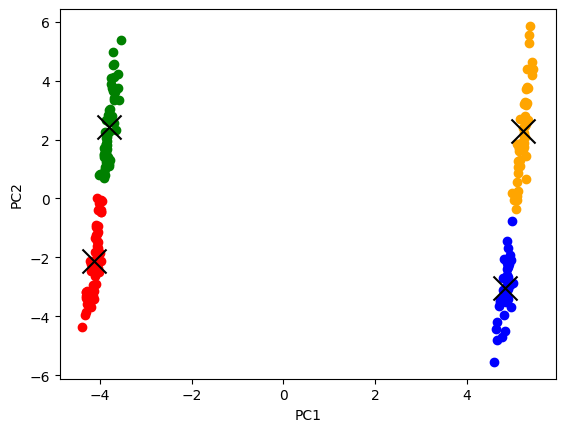

In [35]:
# Visualizing each cluster on 2D graph with scatter plot
plt.scatter(reduced_df[reduced_df['Clusters'] == 0].loc[:,'PC1'], reduced_df[reduced_df['Clusters'] == 0].loc[:,'PC2'], color='red')
plt.scatter(reduced_df[reduced_df['Clusters'] == 1].loc[:,'PC1'], reduced_df[reduced_df['Clusters'] == 1].loc[:,'PC2'], color='blue')
plt.scatter(reduced_df[reduced_df['Clusters'] == 2].loc[:,'PC1'], reduced_df[reduced_df['Clusters'] == 2].loc[:,'PC2'], color='green')
plt.scatter(reduced_df[reduced_df['Clusters'] == 3].loc[:,'PC1'], reduced_df[reduced_df['Clusters'] == 3].loc[:,'PC2'], color='orange')

plt.scatter(reduced_centroids[:,0], reduced_centroids[:,1], color='black', marker='x', s=300)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

We can see that our model has successfully clustered the dataset to four clusters with clear distinctions.

In [37]:
centroids_df # again observing the centers of each clusters to propose Marketing Strategy for each cluster/segment

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,2.806680,4.295082,7.124060
1,10.0,2.774038,4.467213,7.490561
2,1.0,6.211189,4.232489,4.102412
3,10.0,6.441106,4.497951,3.590561


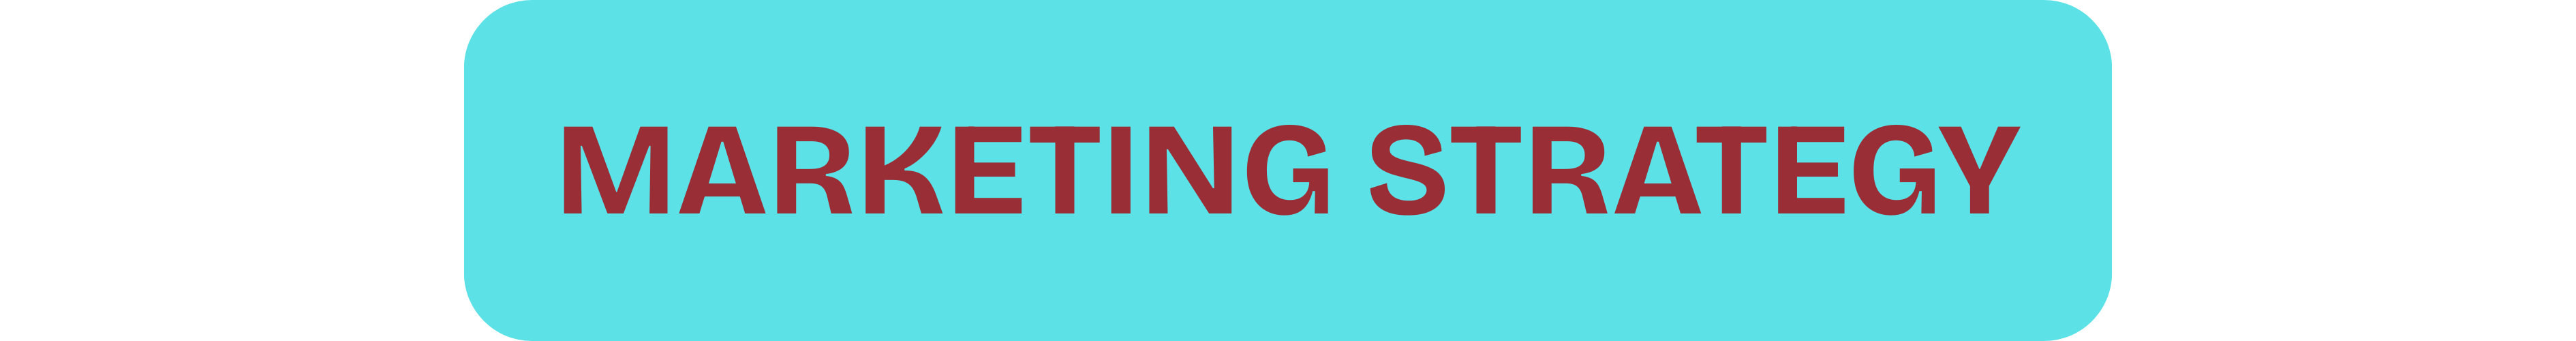

### Proposed **MARKETING STRATEGY** for each segment
---
### **Cluster 0**
[Gender: Female, Age: 48, Income: $ 59k, Spending Score: 34]

**Profile:**--------------- Older **females** with **moderate income** and **average spending scores**   
**Segment Type:**------ *Practical and Cautious Buyers*

**Strategy:**

- Focus on **value-driven campaigns:** quality over quantity.
- Highlight **savings, discounts, and bundles.**
- Email marketing and **product comparisons** (vs competitors) can help them decide.
- Offer **exclusive memberships** with perks for budget-conscious consumers.

---
### **Cluster 1**      
[Gender: Male, Age: 49, Income: $ 62k, Spending Score: 29]

**Profile:**--------------- Older **males, moderate income, low spending**   
**Segment Type:**------ *Reluctant or Uninterested Shoppers*

**Strategy:**

- Use **personalized nudges** (e.g., reminders of abandoned carts or recommendations).
- Try **cross-selling basic add-ons** or **necessity bundles** (less risky than luxury items).
- They may respond better to **utility-focused ads** (what a product does, not how it feels).
- Offer **free trials or demos** to reduce friction.

---
### **Cluster 2**   
[Gender: Female, Age: 28, Income: $ 60k, Spending Score: 68]

**Profile:**--------------- Younger **females, moderate income, high spending**   
**Segment Type:**------ *Trendy & Experience-Oriented Shoppers*

**Strategy:**

- Use **social media influencers** and **aesthetic storytelling** to appeal to this group.
- Highlight **new arrivals, limited editions**, and **fashion-forward collections.**
- Offer **loyalty programs** with social sharing rewards.
- Try **flash sales** or early access campaigns — they value exclusivity and experience.

---
### **Cluster 3**   
[Gender: Male, Age: 28, Income: $ 62k , Spending Score: 72]

**Profile:**--------------- Younger **males** with **moderate income** but **high spending scores**   
**Segment Type:**------ *Impulsive Young Shoppers*

**Strategy:**

- **Push premium upgrades or limited editions** — they’re open to spending even with moderate income.
- Use **mobile-first marketing** and short-form ads (e.g., Instagram Reels, TikTok).
- **Loyalty points** or gamified rewards could keep them engaged.
- Promote **Buy Now, Pay Later** options to drive conversion.



---
Remember to **Upvote** if you found it useful.   
**By:** Ali Jan